Outline:

    Train Logistic regression on the wine data
    
    Use GridSearchCV to tune parameters
    
    Plot decision boundary in 2-D
    
    Play with the learning rate in gradient decent
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
# !gdown --id 1WA0I2LdXT_v0GqyYQ6b92ad7cHm_fmUT

In [3]:
# Only 2 classes

data = pd.read_csv('wine_original.csv')
data = data[data['class'] != 3]
labels = data['class']
del data['class']

data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=5)

### l2- Ridge regression


### l1 - Lasso regression




In [5]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

parameters = { 'penalty': ['l1','l2'], 
              'C':[0.1, 0.5, 1, 2, 3, 4, 5, 10]} 
logreg = LogisticRegression(solver='liblinear')
clf = GridSearchCV(logreg, parameters, cv = 3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
train_acc = accuracy_score(clf.predict(X_train), y_train)
print ('Selected Parameters: ', clf.best_params_)
print ('Training Accuracy = ' + str(train_acc))
print ('Test Accuracy = ' + str(accuracy))

Selected Parameters:  {'C': 1, 'penalty': 'l2'}
Training Accuracy = 0.9903846153846154
Test Accuracy = 0.9615384615384616


In [6]:
from matplotlib.colors import ListedColormap

def PlotBoundray_LR (X_train, X_test, y_train, y_test, col1, col2, C=1000, penalty='l1',solver = 'liblinear', max_iter = 2000):
    h = .008  # step size in the mesh
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


    clf = LogisticRegression(C = C, penalty = penalty, solver = solver, max_iter = max_iter)
    clf.fit(X_train[[col1, col2]], y_train)
    print('clf coefficients are: ' + str(clf.coef_))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[col1].min() - 1, X_train[col1].max() + 1
    y_min, y_max = X_train[col2].min() - 1, X_train[col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training & test points
    plt.scatter(X_train[col1], X_train[col2], c=y_train, cmap=cmap_bold)
    plt.scatter(X_test[col1], X_test[col2], c=y_test, marker='x', cmap=cmap_bold)
    plt.xlabel(col1, fontsize=15)
    plt.ylabel(col2, fontsize=15)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('C = ' + str(C))
    plt.show()

clf coefficients are: [[-5.66608966 -0.16373685]]


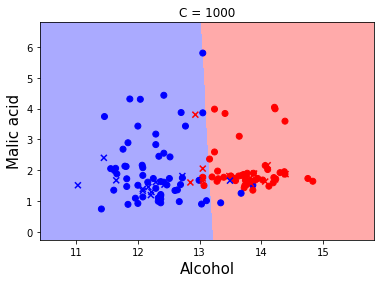

In [7]:
PlotBoundray_LR(X_train, X_test, y_train, y_test, 'Alcohol', 'Malic acid')

clf coefficients are: [[0. 0.]]


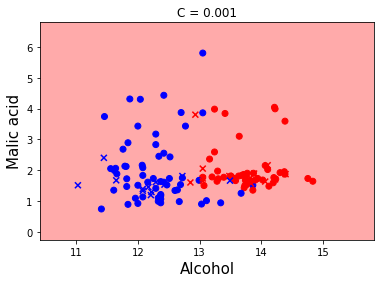

In [8]:
PlotBoundray_LR(X_train, X_test, y_train, y_test, 'Alcohol', 'Malic acid', C=0.001)

#### Comparison of weights

In [9]:
# No penalty
clf = LogisticRegression(penalty='l1', C=100000000,solver = 'liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)) + '\n')
print ('original weights: ')
print (clf.coef_)

Test accuracy = 0.9615384615384616

original weights: 
[[-0.45479717 -4.89779756 -9.2096023   1.86023411 -0.0541913   4.4509649
  -2.76419106 19.25644102  3.66757113 -4.78339867 16.07993051 -3.61973554
  -0.0453164 ]]


In [10]:
# Regularization l1

clf = LogisticRegression(penalty='l1', C=0.5,solver = 'liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)) + '\n')
print ('L1 lasso weights: ')
print (clf.coef_)

Test accuracy = 0.9230769230769231

L1 lasso weights: 
[[ 0.         -0.84023047  0.          0.55632465  0.06964565  0.
   0.          0.          0.         -0.28793716  0.          0.
  -0.01872136]]


In [11]:
# Regularization l2
clf = LogisticRegression(penalty='l2', C=0.5,solver = 'liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ('Test accuracy = ' + str(np.sum(y_pred == y_test)*1.0/len(y_test)) + '\n')
print ('L2 ridge weights: ')
print (clf.coef_)

Test accuracy = 0.9615384615384616

L2 ridge weights: 
[[ 2.36793910e-01 -9.02533913e-01 -3.08314554e-01  5.71540240e-01
   6.02322999e-02  8.58793512e-02 -3.25707475e-01  7.43099794e-04
   3.27724142e-02 -5.31718787e-01  1.80178784e-01 -1.99694524e-01
  -1.84647961e-02]]


### Why l1 gives a sparse weight vector

The Figure 3.11 from Elements of Statistical Learning by Hastie, Tibshirani, and Friedman is very illustrative



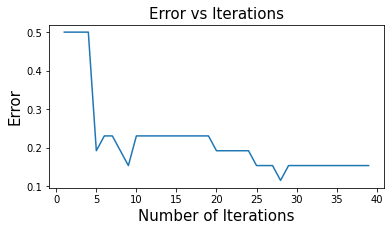

In [12]:
# Effect of number of iterations on accuracy
result=[]
for iter_cnt in range(1, 40):
    clf = LogisticRegression(penalty='l2', max_iter=iter_cnt)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    result.append(1-np.sum(y_pred == y_test)/len(y_test))

# Plot
plt.figure(figsize=(6,3))
plt.title('Error vs Iterations', fontsize=15)
plt.xlabel('Number of Iterations', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.plot(range(1, 40), result)
plt.show()

#### Play with learning rate

SGDClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [13]:
from sklearn.linear_model import SGDClassifier

def PlayLearningRate_LR (X_train, X_test, y_train, y_test, eta0=0):
    # good learning rate
    result = []

    for iter_cnt in range(1, 50):
        # The ‘log’ loss gives logistic regression, a probabilistic classifier.
        clf = SGDClassifier(loss='log', penalty='l2', alpha=0.001, learning_rate='constant', eta0=eta0, verbose=0, random_state=7, n_iter_no_change=iter_cnt)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        result.append(1-np.sum(y_pred == y_test)/len(y_test))

    # Plot
    plt.figure(figsize=(6,3))
    plt.title('learning rate is ' + str(eta0), fontsize=15)
    plt.xlabel('Number of Iterations', fontsize=15)
    plt.ylabel('Error', fontsize=15)
    plt.plot(range(1, 50), result)
    plt.show()

    print ('Test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))
    print (clf.coef_)

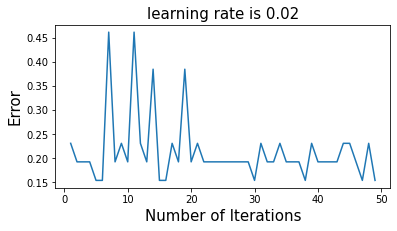

Test accuracy = 0.8461538461538461
[[ 52.48193229  -1.80017952   8.73970886 156.76835623 274.85924144
    6.49485866  -1.18225577   2.87515904   4.50354704  -9.7819393
    7.20453353   9.23349575 -37.54325052]]


In [14]:
PlayLearningRate_LR(X_train, X_test, y_train, y_test, eta0=0.02)

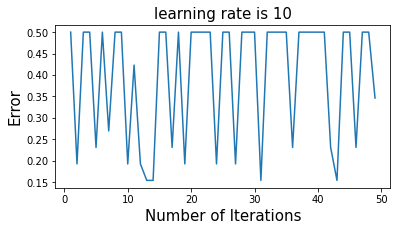

Test accuracy = 0.6538461538461539
[[ 1378.02685111   279.02858499   266.55796252  2974.38317784
  10297.06049145   235.63261527   202.05045049    55.60324657
    206.7601558    104.91144398   132.83569689   327.88283634
  -2408.90593615]]


In [15]:
PlayLearningRate_LR (X_train, X_test, y_train, y_test, eta0=10)

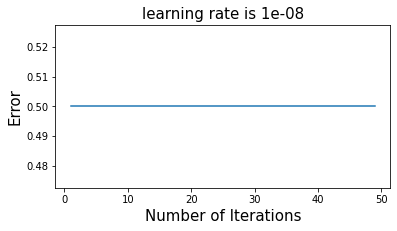

Test accuracy = 0.5
[[ 9.84802343e-05  1.79011417e-05  1.85526066e-05  2.11702028e-04
   7.60069033e-04  1.53219548e-05  1.07170332e-05  4.00458134e-06
   1.26107257e-05  6.10904815e-06  9.41053147e-06  2.16281511e-05
  -6.60531944e-04]]


In [16]:
PlayLearningRate_LR (X_train, X_test, y_train, y_test, eta0=0.00000001)